In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [265]:
#import the dataset

In [266]:
pwd

'/Users/emilmatti'

In [267]:
cd /Users/emilmatti

/Users/emilmatti


In [268]:
df = pd.read_csv('pandemic_college.csv')

In [269]:
df.head()

,Timestamp,"This research project focuses on understanding how a student might choose to attend courses on campus or stay home and take courses fully remote during the pandemic. A survey will be used to gather information about their school situation in the Fall of 2020 and their background. In this online survey you will be asked to take a brief 13-question assessment. The assessment should take approximately less than 5 minutes and will ask very simple questions. All personally identifiable information will be removed from your responses so that your responses remain confidential and cannot be associated with your name. If for any reason during this survey you do not feel comfortable answering any of the questions, you may withdraw from the study. The researcher has identified no foreseeable risks associated with taking this survey. When this research project is complete you will be provided with the results of the experiment if you request them, and you are free to ask any follow up questions on the research. If you have any further questions concerning this study, please feel free to contact the researcher through email: Emil Matti at emil.matti@wagner.edu. Please indicate below that you are 18 years of age or older, and consent to participate in this survey.",1.) Did you attend courses on campus or online in the Fall of 2020?,2) Are you a commuter student?,"3.) If online in the Fall of 2020, are health concerns a primary reason to choose to take online classes?",4.) What grade are you in?,5.) Are you an international student?,6.) What state do you reside in? (skip if international student),7.) Do you have an off campus lease?,"8.) If any, how many classes did your professors make online in the 2020 Fall semester?",9.) Are you a student athlete?,10.) Do you have a significant other that attends Wagner?,"11.) Does your major require you to study on campus? ex. PA, Nursing...",12.) Do you prefer learning online or in a classroom setting?,Unnamed: 14,"If attended class in person in the Fall of 2020, were your friends a factor in your decision to come back to campus?"
0,4/8/2021 12:38:43,"I am at least 18 years of age, and I consent t...","No, attended classes online",No,No,Senior,No,New Jersey,No,3.0,Yes,Yes,No,Online,NaN,I attended classes online.
1,4/12/2021 14:19:25,"I am at least 18 years of age, and I consent t...","No, attended classes online",No,No,Graduate Student,No,California,No,4.0,No,No,No,Classroom,NaN,No
2,4/12/2021 14:19:25,"I am at least 18 years of age, and I consent t...","No, attended classes online",No,No,Senior,No,New York,Yes,4.0,Yes,No,No,Classroom,NaN,I attended classes online.
3,4/12/2021 14:19:33,"I am at least 18 years of age, and I consent t...","Yes, attended classes on campus.",No,I attended in person.,Sophomore,No,Illinois,No,2.0,Yes,No,Yes,Classroom,NaN,No
4,4/12/2021 14:19:40,"I am at least 18 years of age, and I consent t...","Yes, attended classes on campus.",No,I attended in person.,Freshman,No,Massachusetts,No,3.0,Yes,No,No,Classroom,NaN,Yes


In [270]:
df = df.drop(columns = ['This research project focuses on understanding how a student might choose to attend courses on campus or stay home and take courses fully remote during the pandemic. A survey will be used to gather information about their school situation in the Fall of 2020 and their background. In this online survey you will be asked to take a brief 13-question assessment. The assessment should take approximately less than 5 minutes and will ask very simple questions. All personally identifiable information will be removed from your responses so that your responses remain confidential and cannot be associated with your name. If for any reason during this survey you do not feel comfortable answering any of the questions, you may withdraw from the study. The researcher has identified no foreseeable risks associated with taking this survey. When this research project is complete you will be provided with the results of the experiment if you request them, and you are free to ask any follow up questions on the research. If you have any further questions concerning this study, please feel free to contact the researcher through email: Emil Matti at emil.matti@wagner.edu. Please indicate below that you are 18 years of age or older, and consent to participate in this survey.'])

In [271]:
df.columns

Index(['Timestamp',
       '1.) Did you attend courses on campus or online in the Fall of 2020?',
       '2) Are you a commuter student?',
       '3.) If online in the Fall of 2020, are health concerns a primary reason to choose to take online classes?',
       '4.) What grade are you in?', '5.) Are you an international student?',
       '6.) What state do you reside in? (skip if international student)',
       '7.) Do you have an off campus lease?',
       '8.) If any, how many classes did your professors make online in the 2020 Fall semester?',
       '9.) Are you a student athlete?',
       '10.) Do you have a significant other that attends Wagner?',
       '11.) Does your major require you to study on campus? ex. PA, Nursing...',
       '12.) Do you prefer learning online or in a classroom setting?',
       'Unnamed: 14',
       'If attended class in person in the Fall of 2020, were your friends a factor in your decision to come back to campus?'],
      dtype='object')

In [272]:
# RENAME THE COLUMNS

In [273]:
df = df.rename(columns = {"1.) Did you attend courses on campus or online in the Fall of 2020?":
               "decision", "2) Are you a commuter student?":
               "comm"})

In [274]:
df = df.rename(columns = {"3.) If online in the Fall of 2020, are health concerns a primary reason to choose to take online classes?":
               "health_conc"})

In [275]:
df = df.rename(columns = {"4.) What grade are you in?":
               "grade"})

In [276]:
df = df.rename(columns = {"5.) Are you an international student?":
               "inter_stu"})

In [277]:
df = df.rename(columns = {"6.) What state do you reside in? (skip if international student)":
               "hot_spot"})

In [278]:
df = df.rename(columns = {"7.) Do you have an off campus lease?":
               "off_lease"})

In [279]:
df = df.rename(columns = {"8.) If any, how many classes did your professors make online in the 2020 Fall semester?":
               "onl_class"})

In [280]:
df = df.rename(columns = {"9.) Are you a student athlete?":
               "stu_ath"})

In [281]:
df = df.rename(columns = {"10.) Do you have a significant other that attends Wagner?":
               "sign_oth"})

In [282]:
df = df.rename(columns = {"11.) Does your major require you to study on campus? ex. PA, Nursing...":
               "major_req"})

In [283]:
df = df.rename(columns = {"12.) Do you prefer learning online or in a classroom setting?":
               "preference"})

In [284]:
df = df.rename(columns = {"If attended class in person in the Fall of 2020, were your friends a factor in your decision to come back to campus?":
               "friends"})

In [285]:
df.columns

Index(['Timestamp', 'decision', 'comm', 'health_conc', 'grade', 'inter_stu',
       'hot_spot', 'off_lease', 'onl_class', 'stu_ath', 'sign_oth',
       'major_req', 'preference', 'Unnamed: 14', 'friends'],
      dtype='object')

In [287]:
# drop unnamed column
df = df.drop(columns = {'Unnamed: 14'})

In [288]:
df['decision'].value_counts(normalize = True)

Yes, attended classes on campus.    0.678218
No, attended classes online         0.321782
Name: decision, dtype: float64

In [289]:
df['decision'].replace({"Yes, attended classes on campus.": 1, 
           "No, attended classes online": 0}, inplace = True)

#attended class = 1
#online = 0

In [290]:
df['comm'].replace({"Yes": 1, 
           "No": 0}, inplace = True)

#commuter = 1
#not commuter = 0

In [291]:
df['health_conc'].value_counts(normalize = True)

I attended in person.    0.636816
Yes                      0.208955
No                       0.154229
Name: health_conc, dtype: float64

In [292]:
df['health_conc'].replace({"Yes": 1, 
           "No": 0, "I attended in person.": 2}, inplace = True)

#health concerns = 1
#no concerns = 0
#went to campus = 2

In [293]:
df['grade'].replace({"Freshman": 0, 
           "Sophomore": 1, "Junior": 2, "Senior": 3, "Graduate Student": 4}, inplace = True)


In [294]:
df['inter_stu'].replace({"Yes": 1, 
           "No": 0}, inplace = True)

#international = 1
#domestic = 0

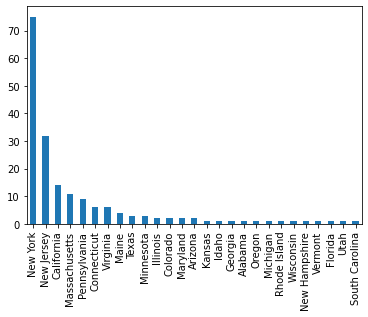

In [295]:
df.hot_spot.value_counts().plot.bar()

In [296]:
type(df['hot_spot'])

pandas.core.series.Series

In [297]:
df['hot_spot'].replace({"Alabama":1,
                        "California":1,
                        "Florida":1, "Georgia": 1, "Idaho": 1, "Texas": 1, "Utah":1, "Wisconsin":1, "Rhode Island": 1, "Virginia": 1, "Illinois": 1, "Minnesota": 1, "Kansas": 1, "New Hampshire": 1, "South Carolina": 1, "Maryland": 1, "Arizona": 1, 
                        "New York": 0, "New Jersey": 0, "Massachusetts": 0, "Pennsylvania": 0, "Colorado": 0, "Maine": 0, "Michigan": 0, "Oregon": 0, "Vermont": 0,}, 
                     inplace = True)

In [298]:
df['hot_spot'].replace({"Connecticut": 0}, inplace = True)

In [299]:
df['off_lease'].replace({"Yes": 1, 
           "No": 0}, inplace = True)
#lease = 1
#no lease = 0

In [300]:
df['stu_ath'].replace({"Yes": 1, 
           "No": 0}, inplace = True)
#athlete = 1
#not athlete = 0

In [301]:
df['sign_oth'].replace({"Yes": 1, 
           "No": 0}, inplace = True)
#significant other = 1
#no boyf or girlf = 0

In [302]:
df['major_req'].replace({"Yes": 1, 
           "No": 0}, inplace = True)
#required = 1
#not required = 0

In [303]:
df['preference'].value_counts(normalize = True)

Classroom    0.816832
Online       0.183168
Name: preference, dtype: float64

In [304]:
df['preference'].replace({"Classroom": 1, 
           "Online": 0}, inplace = True)
#prefer classroom = 1
#prefer online = 0

In [305]:
df['friends'].value_counts(normalize = True)

Yes                           0.455446
I attended classes online.    0.282178
No                            0.262376
Name: friends, dtype: float64

In [306]:
df['friends'].replace({"Yes": 2, 
           "No": 1,
            "I attended classes online.": 0}, inplace = True)

# was online = 0
#friends weren't a factor = 1
# friends were a factor = 2

In [307]:
# CHECK ALL MISSING VALUES

In [308]:
df.isnull().sum() 

Timestamp       0
decision        0
comm            0
health_conc     1
grade           0
inter_stu       0
hot_spot       18
off_lease       2
onl_class       5
stu_ath         0
sign_oth        0
major_req       0
preference      0
friends         0
dtype: int64

In [309]:
# fill in onl_class w/ median
# fill in health_conc w/ mode
# check if all missing hot_spots are international students... elif fill with mode
# off_lease fill with mode

In [310]:
df['hot_spot'].fillna(0, inplace = True)

In [311]:
df['health_conc'].fillna(2.0, inplace = True)

In [312]:
df[(df['off_lease']!= 1) & (df['off_lease']!= 0) ]

,Timestamp,decision,comm,health_conc,grade,inter_stu,hot_spot,off_lease,onl_class,stu_ath,sign_oth,major_req,preference,friends
99,4/12/2021 16:16:13,1,1,2.0,2,0,0.0,NaN,4.0,0,0,1,0,1
166,4/13/2021 15:28:01,1,0,2.0,0,0,0.0,NaN,2.0,0,0,1,1,1


In [313]:
df['off_lease'].fillna(0, inplace = True)

In [314]:
df['onl_class'].median()

3.0

In [315]:
df['onl_class'].fillna(3, inplace = True)

In [316]:
df['inter_stu'].value_counts()

0    185
1     17
Name: inter_stu, dtype: int64

In [317]:
df.to_csv('cleaned_thesis.csv')

In [318]:
###############################################

# Exploratory Data Analysis #


###############################################

In [319]:
df.shape
#print('The sample size is of 202 students with 14 different variables.')

(202, 14)

In [320]:
df.columns

Index(['Timestamp', 'decision', 'comm', 'health_conc', 'grade', 'inter_stu',
       'hot_spot', 'off_lease', 'onl_class', 'stu_ath', 'sign_oth',
       'major_req', 'preference', 'friends'],
      dtype='object')

In [321]:
df.describe()

,decision,comm,health_conc,grade,inter_stu,hot_spot,off_lease,onl_class,stu_ath,sign_oth,major_req,preference,friends
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.678218,0.346535,1.485149,1.732673,0.084158,0.207921,0.123762,2.777228,0.430693,0.168317,0.316832,0.816832,1.173267
std,0.468321,0.477048,0.747984,1.241016,0.278315,0.406828,0.330128,1.575584,0.496403,0.375077,0.466397,0.387765,0.843281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    202 non-null    object 
 1   decision     202 non-null    int64  
 2   comm         202 non-null    int64  
 3   health_conc  202 non-null    float64
 4   grade        202 non-null    int64  
 5   inter_stu    202 non-null    int64  
 6   hot_spot     202 non-null    float64
 7   off_lease    202 non-null    float64
 8   onl_class    202 non-null    float64
 9   stu_ath      202 non-null    int64  
 10  sign_oth     202 non-null    int64  
 11  major_req    202 non-null    int64  
 12  preference   202 non-null    int64  
 13  friends      202 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 22.2+ KB


In [323]:
# How many students went back to campus in the fall and how many stayed online?
df.decision.value_counts()

1    137
0     65
Name: decision, dtype: int64

In [344]:
# How many students lived in a restricted state?
pd.crosstab(df['decision'],df['hot_spot'])

hot_spot,0.0,1.0
decision,,
0,50,15
1,110,27


In [347]:
df.hot_spot.value_counts()

0.0    160
1.0     42
Name: hot_spot, dtype: int64

In [345]:
# What was the average amount of classes on a student's schedule who decided to come back to campus in the Fall?
df[df['decision']== 1]['onl_class'].mean()

2.321167883211679

In [346]:
# What was the average amount of classes on a student's schedule who decided to stay home in the Fall?
df[df['decision']== 0]['onl_class'].mean()

3.7384615384615385

In [349]:
pd.crosstab(df['decision'], df['stu_ath'])

stu_ath,0,1
decision,,
0,47,18
1,68,69


In [326]:
# 47 students were online and are not student athletes
# 18 students were online and ARE student athletes
# 68 students were in person and NOT student athletes
# 69 students were in person and student athletes

In [327]:
per = (69/(69+18))*100
print(per, "% of student athletes decided to come back to campus.")

79.3103448275862 % of student athletes decided to come back to campus.


In [328]:
df.health_conc.value_counts()

2.0    129
1.0     42
0.0     31
Name: health_conc, dtype: int64

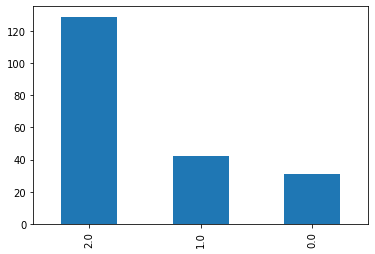

In [329]:
df.health_conc.value_counts().plot.bar()

Text(0.5, 0, 'Requirement')

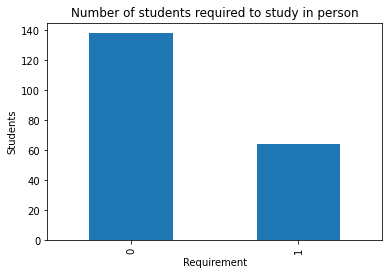

In [379]:
df.major_req.value_counts().plot(kind = 'bar')
plt.title("Number of students required to study in person")
plt.ylabel('Students')
plt.xlabel('Requirement')

In [331]:
df.major_req.value_counts()
print('138 people did not need to come back to campus because of their major and 64 students needed to come back to campus due to their major.')

138 people did not need to come back to campus because of their major and 64 students needed to come back to campus due to their major.


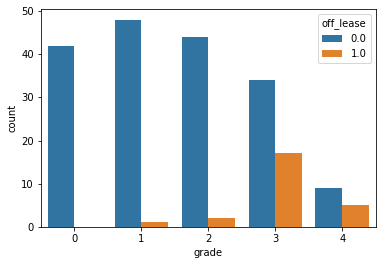

In [375]:
sns.countplot(x = 'grade', hue = 'off_lease',
             data=df)

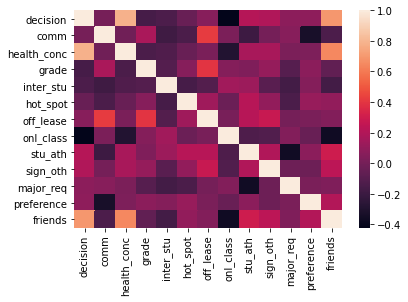

In [381]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels = corr.columns)

In [332]:
# perform the regression

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [334]:
x = df.drop(['decision','health_conc', 'Timestamp'], axis=1)
y = df['decision']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [336]:
lin = LinearRegression()

In [337]:
lin.fit(X_train, y_train)

LinearRegression()

In [338]:
pred = lin.predict(X_test)

In [339]:
print('predicted responses: ', pred, sep='\n')

predicted responses: 
[1.07715614 0.73333394 0.17956452 1.00462059 0.73333394 0.24135413
 1.07715614 0.19943524 0.84823017 1.06341178 0.00196069 0.61101372
 0.72339763 0.90610269 0.93587354 0.8919718  0.63949445 0.07189676
 0.20612861 0.22148341 0.95506617 0.07070774 1.01637877 0.23742275
 0.64664631 0.78125586 0.87603247 0.94425306 0.82150847 1.01637877
 0.53665473 1.08875704 0.1487531  0.60933316 0.35888713 0.45418432
 0.39602572 1.16222917 0.77402739 0.83415072 0.22148341 0.57256957
 0.63162564 0.26896449 0.0865598  0.80349691 0.17085365 0.34553833
 0.9767802  1.00721983 0.90610269 0.43952128 0.83184847 0.42604356
 0.52553084 1.0355571  0.66679582 1.10065809 1.03391152 0.53780915
 1.00553926]


In [340]:
# check efficiency 

In [341]:
r_squared = lin.score(X_test, y_test)*100

In [342]:
print("R^2: ",r_squared)

R^2:  59.959456847341954
